# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Montana\Regulatory


## Regulatory Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/ConservationDistricts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Conservation_Districts.zip', compression=dict(method='zip', archive_name='Conservation_Districts.csv'), index=False)

print(len(dfin1))
dfin1.head()

59


,OBJECTID,DISTRICT_N,MACD_AREA,MACD_NAME,ORG_DATE,URL,SQMILES,ACRES,SHAPE_Leng,SHAPE_Area,geometry,WaDEUUID
0,1,Valley County Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,5056.39222,130960481.26100,6.72585,1.59046,"POLYGON ((-106.15193 48.85645, -106.15193 48.8...",re0
1,2,Toole County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,1943.84867,50345650.92060,3.52242,0.61474,"POLYGON ((-111.26988 48.99724, -111.26988 48.9...",re1
2,3,Blaine County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,4236.22555,109718177.00300,5.53664,1.33405,"POLYGON ((-108.23640 48.99673, -108.23640 48.9...",re2
3,4,McCone Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,2679.08836,69388347.53940,4.88254,0.83153,"POLYGON ((-105.32448 48.08853, -105.32409 48.0...",re3
4,5,Dawson County Conservation District,2,Southeast,1945-08-07,http://dnrc.mt.gov/divisions/cardd/conservatio...,2380.63448,61658396.61250,4.10532,0.73377,"POLYGON ((-105.23499 47.70730, -105.23501 47.7...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/3/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "MTre_01"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["MACD_NAME"]
df['in_ReportingUnitNativeID'] = "MTre" + dfin1["OBJECTID"].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Conservation Districts"
df['in_ReportingUnitUpdateDate'] = "9/21/2021"
df['in_StateCV'] = "MT"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Montana Department of Natural Resources"
df['in_RegulatoryDescription'] = "Help citizens conserve their soil, water, and other renewable natural resources."
df['in_RegulatoryName'] = dfin1["MACD_NAME"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = dfin1["ORG_DATE"]
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Conservation District"
df['in_WaterSourceTypeCV'] = "Surface Water"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

59


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/3/2023,2023,MTre_01,4326,Northeast,MTre1,,Conservation Districts,9/21/2021,MT,,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,1,Active,,,1945-06-21,,Conservation District,Surface Water
1,re1,8/3/2023,2023,MTre_01,4326,North Central,MTre2,,Conservation Districts,9/21/2021,MT,,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,2,Active,,,1947-12-27,,Conservation District,Surface Water
2,re2,8/3/2023,2023,MTre_01,4326,North Central,MTre3,,Conservation Districts,9/21/2021,MT,,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,3,Active,,,1947-12-27,,Conservation District,Surface Water
3,re3,8/3/2023,2023,MTre_01,4326,Northeast,MTre4,,Conservation Districts,9/21/2021,MT,,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,4,Active,,,1945-06-21,,Conservation District,Surface Water
4,re4,8/3/2023,2023,MTre_01,4326,Southeast,MTre5,,Conservation Districts,9/21/2021,MT,,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Southeast,5,Active,,,1945-08-07,,Conservation District,Surface Water


## Regulatory Area #2

In [5]:
# etc etc,

## Concatenate POD and POU Data.  Make needed changes

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

59


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Northeast', 'North Central', 'Southeast', 'Northwest',
       'South Central', 'Southwest', ''], dtype=object)

In [9]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Help citizens conserve their soil, water, and other renewable natural resources.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Northeast', 'North Central', 'Southeast', 'Northwest',
       'South Central', 'Southwest', ''], dtype=object)

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1945-06-21T00:00:00.000000000', '1947-12-27T00:00:00.000000000',
       '1945-08-07T00:00:00.000000000', '1943-11-03T00:00:00.000000000',
       '1946-07-19T00:00:00.000000000', '1957-07-25T00:00:00.000000000',
                                 'NaT', '1946-05-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [12]:
# Input File
shapeInputFile = "RawInputData/shapefiles/ConservationDistricts.zip"
gdfin1 = gpd.read_file(shapeInputFile)
print(len(gdfin1))
gdfin1.head()

59


,OBJECTID,DISTRICT_N,MACD_AREA,MACD_NAME,ORG_DATE,URL,SQMILES,ACRES,SHAPE_Leng,SHAPE_Area,geometry
0,1,Valley County Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,5056.39222,130960481.26100,6.72585,1.59046,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,2,Toole County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,1943.84867,50345650.92060,3.52242,0.61474,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,3,Blaine County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,4236.22555,109718177.00300,5.53664,1.33405,"POLYGON ((-108.23640 48.99673, -108.23640 48.9..."
3,4,McCone Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,2679.08836,69388347.53940,4.88254,0.83153,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,5,Dawson County Conservation District,2,Southeast,1945-08-07,http://dnrc.mt.gov/divisions/cardd/conservatio...,2380.63448,61658396.61250,4.10532,0.73377,"POLYGON ((-105.23499 47.70730, -105.23501 47.7..."


<AxesSubplot: >

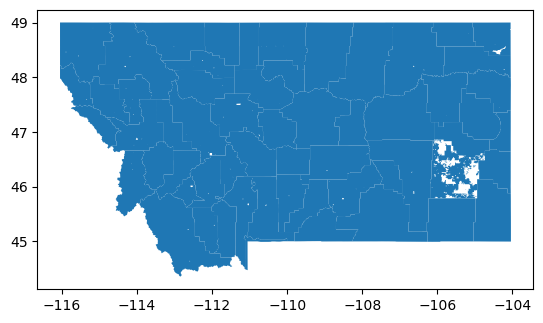

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  "MTre" + gdfin1["OBJECTID"].replace("", 0).fillna(0).astype(int).astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

59


,in_ReportingUnitNativeID,geometry
0,MTre1,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,MTre2,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,MTre3,"POLYGON ((-108.23640 48.99673, -108.23640 48.9..."
3,MTre4,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,MTre5,"POLYGON ((-105.23499 47.70730, -105.23501 47.7..."


#### Regulatory Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

59


,in_ReportingUnitNativeID,geometry
0,MTre1,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,MTre2,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,MTre3,"POLYGON ((-108.23640 48.99673, -108.23640 48.9..."
3,MTre4,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,MTre5,"POLYGON ((-105.23499 47.70730, -105.23501 47.7..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID               int64
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [19]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_mtMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.